# Example notebook : explain global and local for binary classification

## Load packages

In [1]:
from transparentai.datasets import load_adult
from transparentai.explainer import ModelExplainer

from transparentai.utils import encode_categorical_vars

import pickle

## Load data

In [2]:
adult = load_adult()

## Load model

In [3]:
with open('save/model_binary_classification.pkl', mode='rb') as file:
    clf = pickle.load(file)
file.close()

## Prepare data

In [4]:
target = 'income'
target_value = {'>50K':1, '<=50K':0}
adult[target] = adult[target].replace(target_value)

In [5]:
adult, encoders = encode_categorical_vars(adult)
X, y = adult.drop(columns=target), adult[target]

## Create model explainer

In [6]:
feature_names = X.columns
explainer = ModelExplainer(model=clf, X=X, 
                           feature_names=feature_names, model_type='tree')

## Global explanation

In [7]:
explainer.explain_global(X.sample(100))

 95%|=================== | 190/200 [00:14<00:00]       

{'age': 0.04690632801141865,
 'workclass': 0.011251425190239361,
 'fnlwgt': 0.015686679181080056,
 'education': 0.017542966422872616,
 'education-num': 0.04696532375632745,
 'marital-status': 0.053292388716878,
 'occupation': 0.02677984175111092,
 'relationship': 0.0533734647964403,
 'race': 0.00338280302635767,
 'gender': 0.008960750931154915,
 'capital-gain': 0.03837967398206947,
 'capital-loss': 0.01699366246691048,
 'hours-per-week': 0.03496192314756819,
 'native-country': 0.002137496497232661}

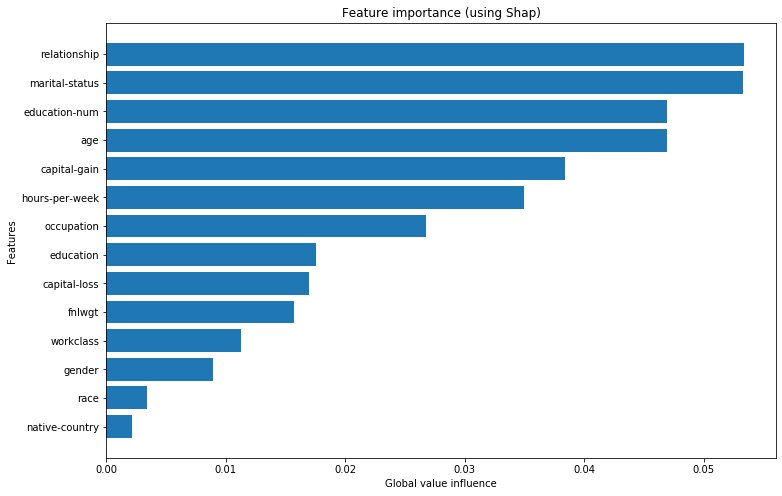

In [9]:
explainer.plot_global_explain()

## Local explanation

In [12]:
one_row = X.iloc[42]
explainer.explain_local(one_row)

{'age=36': 0.0014744643155336235,
 'workclass=4': -0.007858214323823632,
 'fnlwgt=465326': 0.0076308927461468555,
 'education=11': -0.008331170824967558,
 'education-num=9': -0.07064434512099979,
 'marital-status=2': 0.03647484135694867,
 'occupation=5': -0.1011829572127408,
 'relationship=0': 0.026644444345229203,
 'race=4': 0.0017796229958003096,
 'gender=1': 0.00027837295926474325,
 'capital-gain=0': -0.019829463934438536,
 'capital-loss=0': -0.012327896780916489,
 'hours-per-week=40': -0.017970496110874593,
 'native-country=39': -0.0015380953689509624}

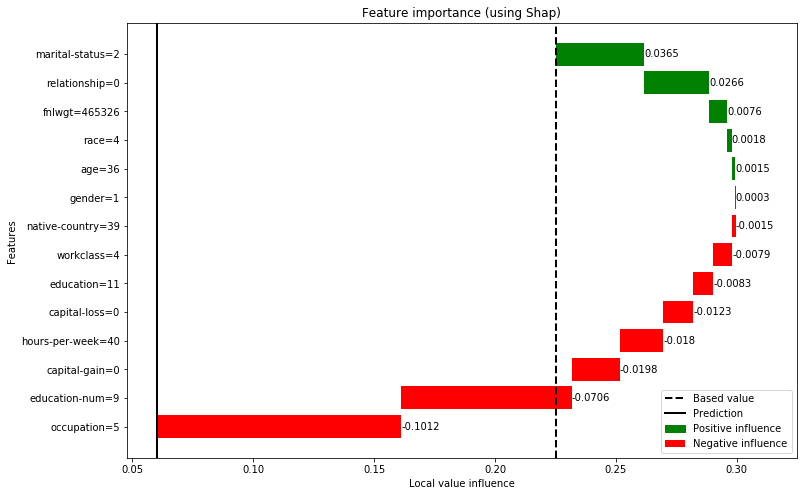

In [14]:
explainer.plot_local_explain(one_row)

## The end.